In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics

In [12]:
df = pd.read_csv(r'D:\Code\AAA_github\KHDL_IT4930\dataset\data.csv', sep='\t', index_col=0)
df.head()

,kieu_dang,hop_so,km_da_di,nhien_lieu,so_cho_ngoi,tinh_trang,xuat_xu,nam_sx,gia,dong_xe,hang
0,Sedan,Tự động,9000,Xăng,5,Đã sử dụng,Lắp ráp trong nước,2019,4480000000,Sclass,Mercedes Benz
1,Sedan,Tự động,20000,Xăng,5,Đã sử dụng,Lắp ráp trong nước,2017,1155000000,Cclass,Mercedes Benz
2,SUV / Cross over,Tự động,0,Xăng,5,Mới,Lắp ráp trong nước,2021,579000000,Kona,Hyundai
3,SUV / Cross over,Tự động,0,Xăng,5,Mới,Lắp ráp trong nước,2021,825000000,Tucson,Hyundai
4,Sedan,Tự động,32000,Xăng,4,Đã sử dụng,Nhập khẩu,2017,5750000000,Panamera,Porsche


In [14]:
df = pd.get_dummies(df, columns=['tinh_trang', 'hang', 'dong_xe', 'xuat_xu', 'kieu_dang', 'nhien_lieu', 'hop_so'])

In [15]:
X = df.drop(['gia'], axis=1)
y = df['gia']

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Linear Regression


In [17]:
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

LinearRegression()

In [18]:
y_hat = linear_model.predict(X_test)
error_score = metrics.r2_score(y_test, y_hat)
print("R squared Error : ", error_score)

R squared Error :  0.8285789804822449


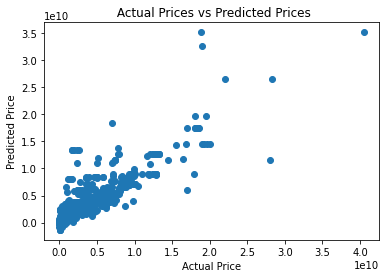

In [19]:
plt.scatter(y_test, y_hat)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

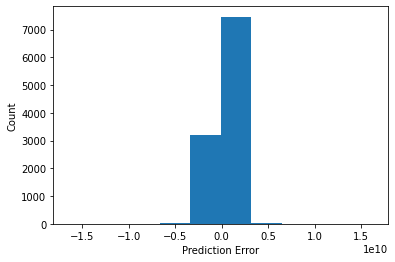

In [20]:
error = y_hat - y_test
plt.hist(error, bins=10)
plt.xlabel('Prediction Error')
_ = plt.ylabel('Count')

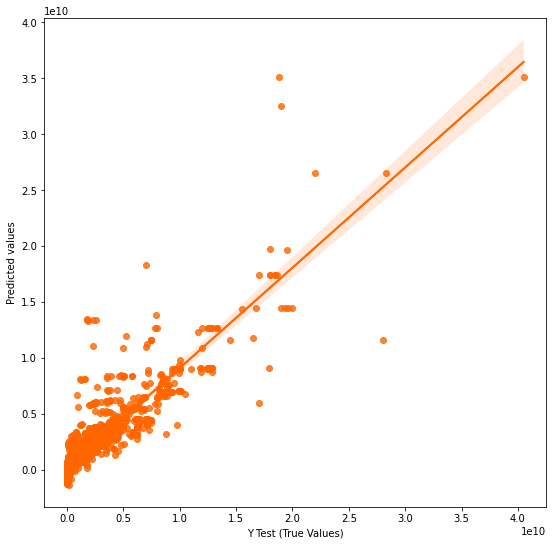

In [21]:
plt.rcParams.update(plt.rcParamsDefault)
%matplotlib inline
plt.figure(figsize=(9,9))
sns.regplot(x =y_test,y = y_hat, color='#FF6600')
plt.xlabel('Y Test (True Values)')
plt.ylabel('Predicted values')
plt.show()

In [22]:
metrics.mean_absolute_error(y_test, y_hat)


240101929.47196493